c:\Users\USER\anaconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


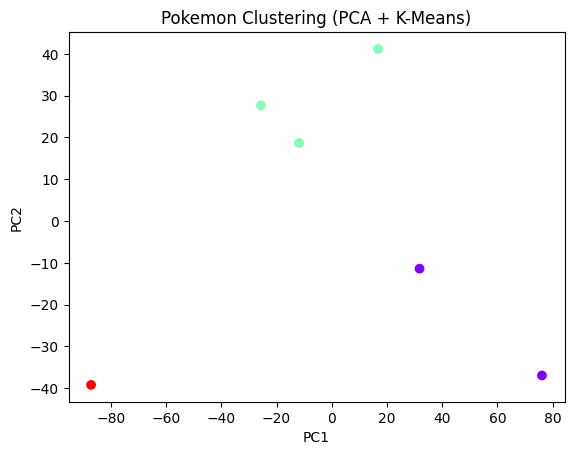

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 포켓몬 스탯 데이터 불러오기

data = {
    "Name": ["Pikachu", "Charizard", "Snorlax", "Dragonite", "Venusaur", "Lapras"],
    "HP": [35, 78, 160, 91, 80, 130],
    "Attack": [55, 84, 110, 134, 82, 85],
    "Defense": [40, 78, 65, 95, 83, 80],
    "Sp_Atk": [50, 109, 65, 100, 100, 85],
    "Sp_Def": [50, 85, 110, 100, 100, 95],
    "Speed": [90, 100, 30, 80, 80, 60]
}

df = pd.DataFrame(data)

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
reduced = pca.fit_transform(df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']])

# 군집화
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced)

# 시각화
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap='rainbow')
plt.title('Pokemon Clustering (PCA + K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Explained variance ratio (PC1, PC2): [0.41276751 0.40100234]
Cumulative (PC1+PC2): 0.8137698572508372


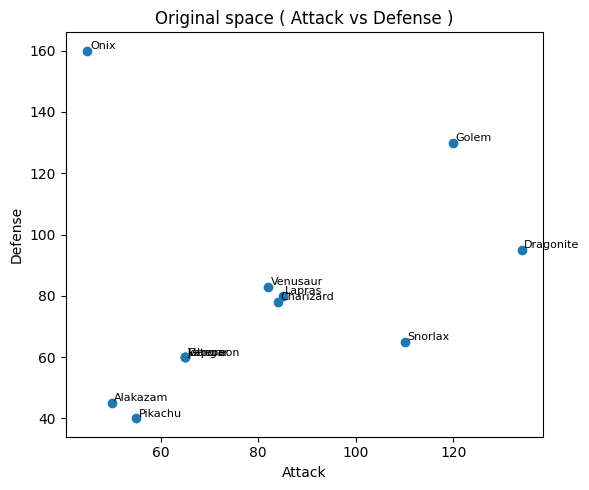

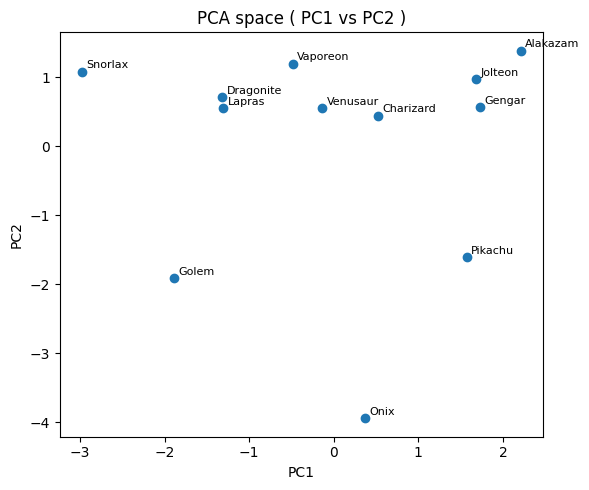


[PC1 Loadings - PC1에 많이 기여한 특성(+) 순서]
Speed      0.579767
Sp_Atk     0.265071
Sp_Def    -0.210002
Defense   -0.241832
HP        -0.492305
Attack    -0.498659
dtype: float64

[PC2 Loadings - PC2에 많이 기여한 특성(+) 순서]
Sp_Def     0.578008
Sp_Atk     0.532548
HP         0.343395
Speed      0.165388
Attack     0.121563
Defense   -0.471432
dtype: float64


In [3]:
# =========================
# PCA로 6차원(포켓몬 스탯) → 2차원 축소 시각화
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) 샘플 데이터 (일부 포켓몬, Gen1 기준 대표 스탯)
data = {
    "Name": [
        "Pikachu","Charizard","Snorlax","Dragonite","Venusaur","Lapras",
        "Gengar","Onix","Alakazam","Golem","Jolteon","Vaporeon"
    ],
    "HP":      [35, 78,160, 91, 80,130, 60, 35, 55, 80, 65,130],
    "Attack":  [55, 84,110,134, 82, 85, 65, 45, 50,120, 65, 65],
    "Defense": [40, 78, 65, 95, 83, 80, 60,160, 45,130, 60, 60],
    "Sp_Atk":  [50,109, 65,100,100, 85,130, 30,135, 55,110,110],
    "Sp_Def":  [50, 85,110,100,100, 95, 75, 45, 95, 65, 95, 95],
    "Speed":   [90,100, 30, 80, 80, 60,110, 70,120, 45,130, 65]
}
df = pd.DataFrame(data)

features = ["HP","Attack","Defense","Sp_Atk","Sp_Def","Speed"]
X = df[features].values

# 2) 표준화(각 특성 스케일 다르므로 필수)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3) PCA로 2차원 축소
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

# 설명분산비율(= 각 주성분이 담은 정보량)
evr = pca.explained_variance_ratio_
print("Explained variance ratio (PC1, PC2):", evr)
print("Cumulative (PC1+PC2):", evr.sum())

# =========================
# 4) 시각화
#    (A) 원래 축(공격 vs 방어) — 임의 투영
#    (B) PCA 축(PC1 vs PC2) — 데이터가 '가장 퍼진 방향'으로 회전·압축
# =========================

# (A) 공격 vs 방어 (임의 축)
plt.figure(figsize=(6, 5))
plt.scatter(df["Attack"], df["Defense"])
for i, name in enumerate(df["Name"]):
    plt.text(df["Attack"][i]+0.5, df["Defense"][i]+0.5, name, fontsize=8)
plt.title("Original space ( Attack vs Defense )")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.tight_layout()
plt.show()

# (B) PCA 2D
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, name in enumerate(df["Name"]):
    plt.text(X_pca[i, 0]+0.05, X_pca[i, 1]+0.05, name, fontsize=8)
plt.title("PCA space ( PC1 vs PC2 )")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# =========================
# 5) 직관 포인트 출력
# =========================
# PC1, PC2가 어떤 방향을 의미하는지 감각을 잡도록 간단 해석 힌트
# (절대적인 정답은 아님. 데이터에 따라 달라짐)
pc1_loading = pd.Series(pca.components_[0], index=features).sort_values(ascending=False)
pc2_loading = pd.Series(pca.components_[1], index=features).sort_values(ascending=False)

print("\n[PC1 Loadings - PC1에 많이 기여한 특성(+) 순서]")
print(pc1_loading)
print("\n[PC2 Loadings - PC2에 많이 기여한 특성(+) 순서]")
print(pc2_loading)

# 해석 가이드:
# - PC1에 양(+)으로 큰 특성들이 많으면, 그 특성들이 커질수록 점이 오른쪽으로 이동.
# - PC2도 동일하게, 값이 클수록 위로 이동.
# 예) PC1에 Attack/Sp_Atk/HP가 크면, '전투력/체력 축' 성격이 강함.


In [4]:
import numpy as np

# pca.components_  shape: (n_components, n_features)
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("PC1 · PC2 (내적) =", np.dot(pc1, pc2))  # ≈ 0 (부동소수 오차로 아주 작은 수)


PC1 · PC2 (내적) = 1.3877787807814457e-16


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [8]:
X = iris.data
X.shape

(150, 4)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(150, 2)

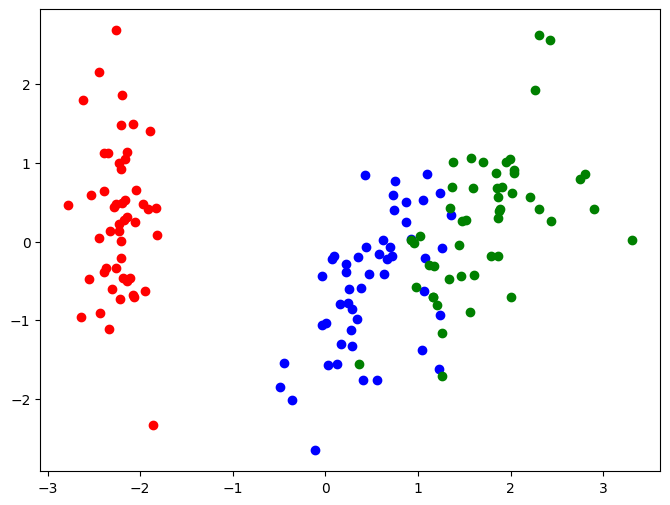

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
color =['red','blue','green']

for i in range(3):
    mask = iris.target == i
    plt.scatter(X_pca[mask,0],X_pca[mask,1], c=color[i])

In [21]:
import numpy as np

# pca.components_  shape: (n_components, n_features)
pc1 = pca.components_[0]
pc2 = pca.components_[1]
print("PC1 · PC2 (내적) =", np.dot(pc1, pc2))  # ≈ 0 (부동소수 오차로 아주 작은 수)


PC1 · PC2 (내적) = -2.220446049250313e-16


In [19]:

import pandas as pd
import numpy as np

features = ["HP","Attack","Defense","Sp_Atk","Sp_Def","Speed"]
cov_matrix = np.cov(df[features].T)
pd.DataFrame(cov_matrix, index=features, columns=features)


,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
HP,1518.022727,587.363636,-203.909091,100.022727,579.318182,-745.909091
Attack,587.363636,807.818182,228.000000,-89.909091,242.272727,-454.090909
Defense,-203.909091,228.000000,1216.969697,-691.666667,-314.393939,-448.484848
Sp_Atk,100.022727,-89.909091,-691.666667,1096.446970,415.833333,623.333333
Sp_Def,579.318182,242.272727,-314.393939,415.833333,435.606061,-21.212121
Speed,-745.909091,-454.090909,-448.484848,623.333333,-21.212121,901.515152
